# Analysing Westbound traffic on the I-94 Interstate highway

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. Thes indicators can be weather type, time of the day, time of the week, e.t.c.  
For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd

traffic = pd.read_csv(
    'Metro_Interstate_Traffic_Volume.csv',
parse_dates = ['date_time'])

In [2]:
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


## Analyzing Traffic Volume

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data.  
Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

In [4]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

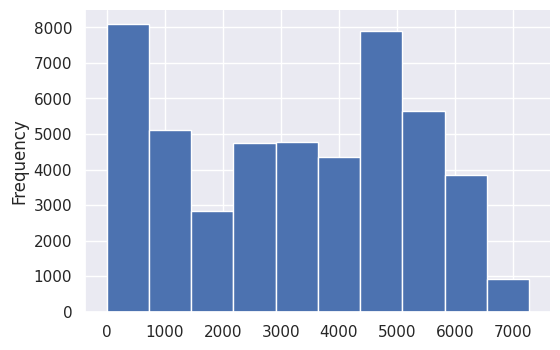

In [5]:
sns.set()

traffic['traffic_volume'].plot.hist()
sns.despine()

plt.show()


In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between **2012-10-02 09:00:00** and **2018-09-30 23:00:00** , traffic volume varied from 0 to 7280 cars.

* Additionally, about 25% of the time, 1193 cars are on the road. This traffic probably took place at night.

* Futhermore, an average of approximately 3260 cars are always on the I-94 highway relative to the station from where the records were taken.  
* About 25% of the time, the traffic volume was four times as much (4933 cars or more).

## Traffic Volume: Day vs. Night

The possibility that night-time and daytime might influence traffic volumen gives our analysis an interesting direction: comparing daytime with nightime data.

We will start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m to 7 p.m (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [7]:
traffic['hour'] = traffic['date_time'].dt.hour

daytime = traffic.copy()[(traffic['hour'] >=7) &
                        (traffic['hour'] < 19)]

nighttime = traffic.copy()[(traffic['hour'] >=19) |
                          (traffic['hour'] < 7)]

print(daytime.shape, sep='\n')
print(nighttime.shape)

(23877, 10)
(24327, 10)


## Traffic Volume: Day vs. Night (II)

We are going to compare the traffic volume at night and during day

Text(0.5, 0, 'Traffic Volume')

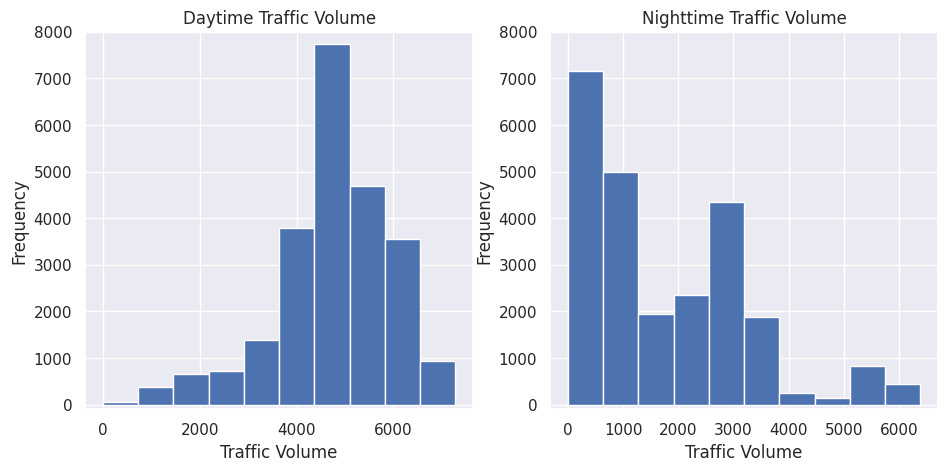

In [8]:
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
daytime['traffic_volume'].plot.hist()
plt.title('Daytime Traffic Volume')
plt.ylim([-100,8000])
plt.xlabel('Traffic Volume')

plt.subplot(1,2,2)
nighttime['traffic_volume'].plot.hist()
plt.ylim([-100,8000])
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')

In [9]:
print(daytime['traffic_volume'].describe(), sep='\n')

nighttime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram for daytime traffic volume is left skewed which means that most traffic volume during the day is high.
Additionally, there are 4252 cars or more passing the station every hour 75% of the time ( because 25% of the traffic volume is less than 4252)

The histogram for nighttime traffic volume is right skewed indicating that most traffic volume at night is low
It was observed that at night time, traffic volume is averagely under 2819, 75% of the time ( although there are instances there are instances of more than 5000 cars per hour, it is not the norm)

Since we are interested in Indicators of heavy traffic, we will henceforth focus only the *day time* data since high traffic volume is likely to occur during the day.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We are going to look at a few line plots showing how the traffic volume changed according to the following parameters:
* Month
* Day of the week
* Time of day

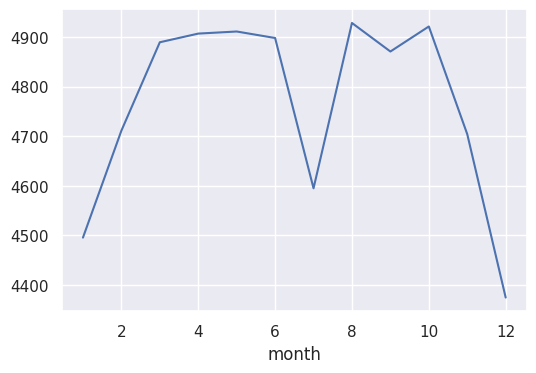

In [10]:
daytime['month'] = daytime['date_time'].dt.month

monthly_traffic_avg = daytime.groupby('month').mean()

monthly_traffic_avg['traffic_volume'].plot()
plt.show()

During the warmer part of the year, traffic seem very heavy compared to traffic in the colder part of the year. The only exception is July which seem to have less traffic. This phenomenon is worth further examination.

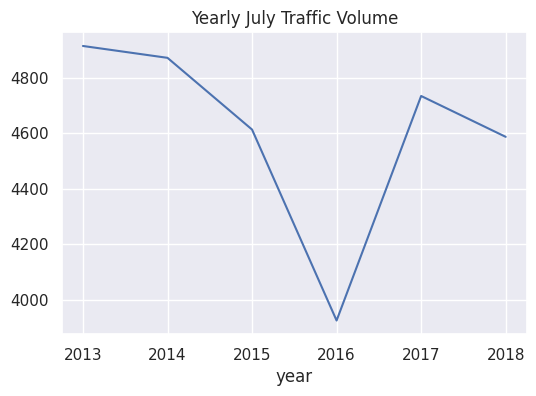

In [11]:
daytime['year'] = daytime['date_time'].dt.year
daytime[daytime['month'] == 7].groupby('year').mean()[
    'traffic_volume'].plot()
plt.title('Yearly July Traffic Volume')
plt.show()

Examining the line plot above, it appears that traffic volume is always quite high at July except in 2016.
Therefore, July 2016 , need to be examined to understand what was responsible for the low traffic passing the station during this time frame.

## Time Indicators (II)

We will continue with building line plots for another time unit: day of the week.

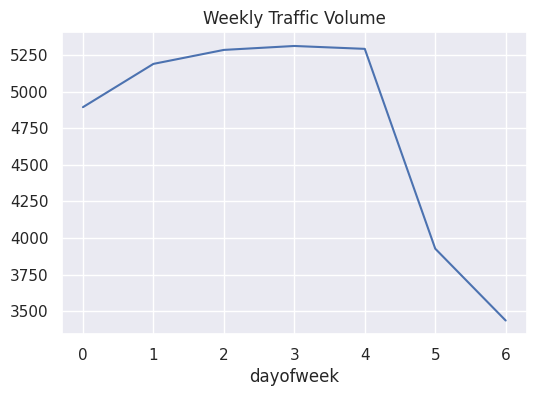

In [12]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek

weekly_traffic_avg = daytime.groupby('dayofweek').mean()

weekly_traffic_avg['traffic_volume'].plot()

plt.title('Weekly Traffic Volume')
plt.show()

Traffic volume appear high during the business days of the week peaking averagely on Friday from which it dives heading into the weekends.
Except for Monday, we see Business days (monday - Friday) having more than 5000 cars per hour. Traffic is generally lower on weekends with traffic going below 4000 cars per hours.

## Time Indicators (III)

We will now genrate a line plot for the time of day. The weekends,however, will drag down the average values, so we're going to look at the averages separately. To do that, We'll start by splitting the data based on the day type - business day or weekend.

Text(0.5, 1.0, 'weekend_hourly')

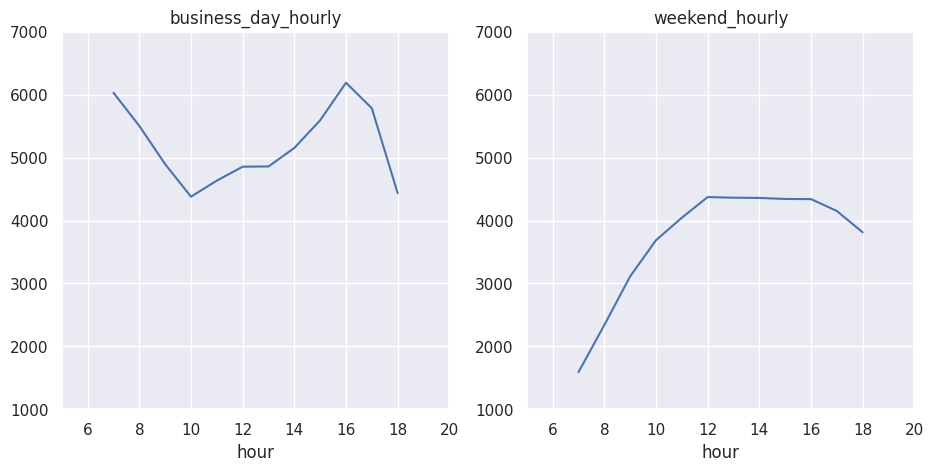

In [13]:
business_days = daytime.copy()[daytime['dayofweek']<=4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek']>=5] # 5 == Saturday

business_day_hourly = business_days.groupby('hour').mean()
weekend_hourly = weekend.groupby('hour').mean()

plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
business_day_hourly['traffic_volume'].plot.line()
plt.ylim([1000,7000])
plt.xlim([5,20])
plt.title('business_day_hourly')

plt.subplot(1,2,2)
weekend_hourly['traffic_volume'].plot.line()
plt.ylim([1000,7000])
plt.xlim([5,20])
plt.title('weekend_hourly')
    

Traffic Volume tend to be higher on business days at every hour during the day compared to weeekends.
Expectedly, the rush hours times are around 7 and 16 - this match with times most people are heading to and leaving from work. We see a high traffic volume of more than 6000 cars at rush hour during the day.

In summary, with regards to time indicators for heavy traffic, we notice a few pattern:

* Traffic is usually heavy during the warmer times of the year (March - October) compared to the winter times ( November to February)
* There tend to heavier traffic during business days compared to weekends

* Rush hours are around 7 and 16 on business days.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`,`clouds_all`,`weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [14]:
daytime[['traffic_volume','temp','rain_1h','snow_1h',
         'clouds_all']].corr()['traffic_volume']

traffic_volume    1.000000
temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
Name: traffic_volume, dtype: float64

Among the numerical weather columns, temp shows the highest correlation at +0.13, although this correlation is very weak. 

Other numerical weather columns - rain_1h, snow_1h, clouds_all do not show any reliable correlation with traffic_volume.

Let's visualize the relationship between temp and traffic_volume

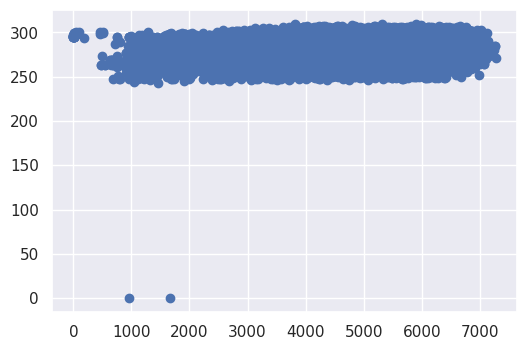

In [15]:
# daytime.plot('traffic_volume','temp',kind='scatter') gives a 
                                                #color keyword error

plt.scatter(x=daytime['traffic_volume'],y=daytime['temp'])
plt.show()

The temp column does not show a correlation with traffic_volume, hence it can't be used as a reliable indicator of heavy traffic.

## Weather Types

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

We are going to calculate the average traffic volume associated with each unique value in these two columns.

In [16]:
daytime.weather_main.value_counts()

Clouds          8702
Clear           5744
Rain            2841
Mist            2593
Snow            1454
Drizzle          883
Haze             834
Thunderstorm     451
Fog              362
Smoke             12
Squall             1
Name: weather_main, dtype: int64

We can convert the weather_main column to numerical values in order to find its correlation with the traffic volume.

In [17]:
col = pd.Categorical(daytime['weather_main']) # converts weather_main
                                            # to numerical
    
daytime['w_code'] = col.codes  # to select the numerical equivalence of
                                # of each unique values 

x_ = dict(zip(sorted(daytime.w_code.value_counts().index), 
              col.categories))  # mapping the different numerical
                        # equivalent of the different unique values
                        # in the 'weather_main' column


print(x_)

daytime[['w_code','traffic_volume']].corr()

{0: 'Clear', 1: 'Clouds', 2: 'Drizzle', 3: 'Fog', 4: 'Haze', 5: 'Mist', 6: 'Rain', 7: 'Smoke', 8: 'Snow', 9: 'Squall', 10: 'Thunderstorm'}


,w_code,traffic_volume
w_code,1.000000,-0.072635
traffic_volume,-0.072635,1.000000


We see that traffic volume and weather_main have a neglible correlation.
Let's plot a barh plot to see how the traffic volume vary during different weather condition in the `weather_main` column

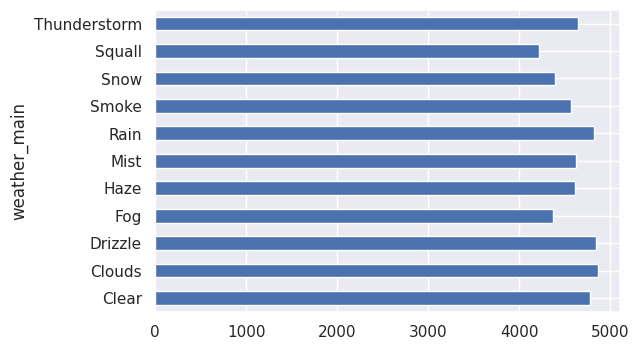

In [18]:
daytime.groupby('weather_main').mean()[
    'traffic_volume'].plot.barh()
plt.show()

It appears that at no point during the different weather type in the weather_main column does traffic volume exceed 5000 cars.
Additionally, traffic volume during the different weather type does not vary much - more than 4000 but less than 5000, hence it makes it difficult to be used as a heavy traffic indicator

Let's examine the weather_description column which has a more granular weather description.

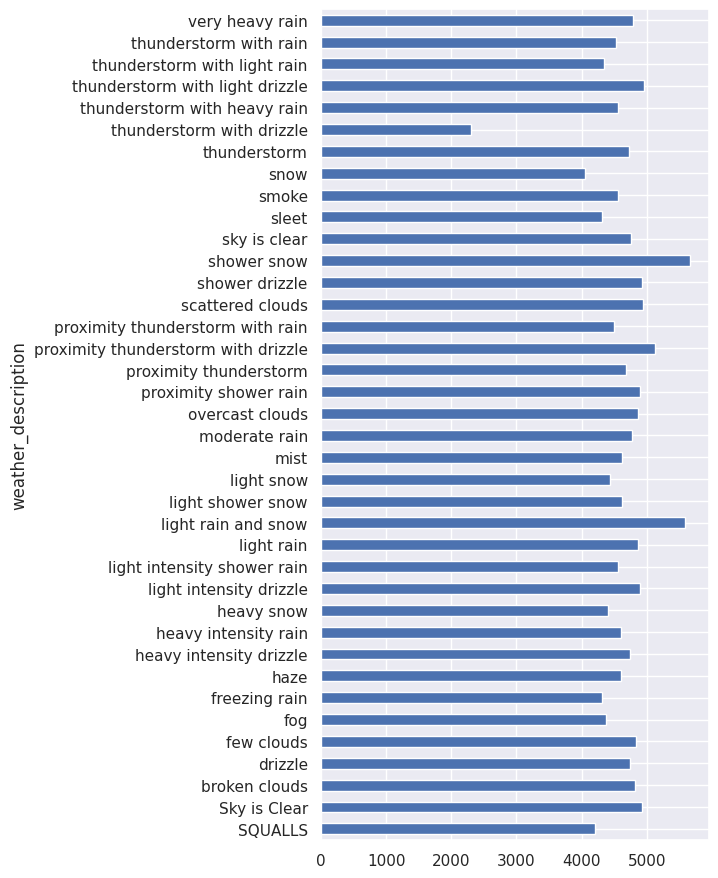

In [19]:
# plt.style.use('fivethirtyeight') #uncomment to add a style from fivethirtyeight.com
daytime.groupby('weather_description').mean()[
    'traffic_volume'].plot.barh(figsize=(5,11))

There are only 3 weather types where traffic volume exceed 5000 cars:
* light rain and snow
* proximity thunderstorm with drizzle
* shower snow

The reason why these weather types (which are bad weather) seem to have greater traffic volume compared to other weather types (good or bad) is not clear. It could be that more people use their cars rather than ride bikes or walking when the weather is bad.

# Conclusion

In line with the goal of our project to find indicators of heavy traffic on the I-94 Interstate highway. Our analysis reveal two types of indicators:

* Time Indicators:
  * The traffic is usually heavier during the warmer months ( March - October) compared to the colder months (November - Februrary)
  * Traffic is usually heavier during the business days of the week compared to the weekends
  * On business days, rush hours are around 7 and 16
  
* Weather Indicator:
  * during `light rain and snow`, `proximity thunderstorm with drizzle`, and `shower snow` there is a heavy traffic of 5000 cars or more.